In [ ]:
""" 
# random search function
def random_search(g,alpha,max_its,w,num_samples):
    # run random search
    weight_history = [] # container for weight history
    cost_history = [] # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        # construct set of random unit directions
        ## TO DO
        # pick best descent direction
        ## TO DO
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])
        # check directions to ensure a real descent direction
        # to take the step in its direction
        ## TO DO
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history
"""

In [ ]:
import numpy as np
import random

# random search function
def random_search(g,alpha,max_its,w,num_samples):
    """
    What are these?
    g, -> function, we give input values and get a result
    alpha -> float value
    max_its -> num of its we run the random_search
    w -> initial weights
    num_samples -> max number of random samples to sample at a particular step
    """
    # run random search
    # Random search -> w(k) = w(k-1) + (alpha*d(k))
    # where w denotes our input feature value
    #   wk -> new value
    #   w(k-1) -> old value
    #   alpha -> step length parameter
    #   d(k) -> step
    #

    weight_history = [] # container for weight history
    cost_history = [] # container for corresponding cost function history
    # alpha = 0 # here we set alpha = 0?
    for k in range(1,max_its+1):
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))

        # construct set of random unit directions
        ## TO DO
    
        # constructing a set of random unit directions?
        # set of random values in [-1,1]? 
        # what do we get here then?
            # we get 1000 samples of w -> two, so almost 2000


        for i in range(num_samples):
            d1, d2 = (random.uniform(-1, 1), random.uniform(-1, 1))
            w1 = w[0] - (alpha*d1)
            w2 = w[1] - (alpha*d2)
            if g([w1, w2]) < g(w):
                w = [w1, w2]
        

        # pick best descent direction
        ## TO DO
     
        # evaluate all candidates

        # evals = np.array([g(w_val) for w_val in w_candidates])
        # check directions to ensure a real descent direction
        # to take the step in its direction
        ## TO DO

        weight_history.append(w)
        cost_history.append(g(w))

    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [159]:
""" 
1. Use your implementation of random search to minimize the function
g(w1, w2) = tanh(4w1 + 4w2) + max(0.4w1**2 , 1) + 1

with the following settings:
• Maximum number of steps: 8
• Step length alpha = 1
• Number of random directions P = 1000
• Initial point w0 = [2, 2]T
"""

import math
import numpy as np
# we have two input features
# w1 and w2
# this is represented as a matrix

initial_point = [2, 2]

# g will be a function for sure

def g(w):
    """
    Function to be optimized, vectorized for numpy operations.
    w can be a single point [w0, w1] or array of points.
    """
    w = np.array(w)
    
    if len(w.shape) == 1:
        # Single point
        return np.tanh(4*w[0] + 4*w[1]) + np.maximum(0.4*(w[0]**2), 1) + 1
    else:
        # Multiple points or meshgrid format
        try:
            return np.tanh(4*w[:,0] + 4*w[:,1]) + np.maximum(0.4*(w[:,0]**2), 1) + 1
        except IndexError:
            # If that fails, the input might be in a different format
            # You might need to inspect what format the library is using
            print("Input format not as expected. Shape:", w.shape)
            return None


weight_history,cost_history = random_search(g=g, alpha=0.1, max_its=10, w=initial_point, num_samples=1000)

In [160]:
for x in weight_history:
    print(x)


[2, 2]
[-1.5810421157742027, -1.9675851095929962]
[-1.5810421157742027, -1.9675851095929962]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]
[-1.5811360009880946, -2.076984625019286]


In [161]:
for x in cost_history:
    print(x)

3.5999999999999748
1.0000000000009373
1.0000000000009373
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904
1.0000000000003904


In [162]:
""" 
2. Visualize the optimization process by creating a plot of the process.
    Tip:
        • Use the static plotter from mlrefined libraries in the textbook's online resources. Alternatively, you can find a link to download the library in OLAT.
        • Example (first import from the libraries and then call the function):
        
        # imports from custom library
        import sys
        sys.path.append('../')
        import matplotlib.pyplot as plt
        import autograd.numpy as np
        # import custom libraries
        from mlrefined_libraries import basics_library as baslib
        from mlrefined_libraries import calculus_library as calib
        from mlrefined_libraries import math_optimization_library as optlib
        # import demos for your notebook
        static_plotter = optlib.static_plotter.Visualizer();
        #call the function for visualising the optim. steps
        static_plotter.two_input_contour_plot(g,weight_history,num_contours = 30,
        xmin = -3.3,xmax = 2.7,ymin = -5,ymax = 3)
"""

" \n2. Visualize the optimization process by creating a plot of the process.\n    Tip:\n        • Use the static plotter from mlrefined libraries in the textbook's online resources. Alternatively, you can find a link to download the library in OLAT.\n        • Example (first import from the libraries and then call the function):\n        \n        # imports from custom library\n        import sys\n        sys.path.append('../')\n        import matplotlib.pyplot as plt\n        import autograd.numpy as np\n        # import custom libraries\n        from mlrefined_libraries import basics_library as baslib\n        from mlrefined_libraries import calculus_library as calib\n        from mlrefined_libraries import math_optimization_library as optlib\n        # import demos for your notebook\n        static_plotter = optlib.static_plotter.Visualizer();\n        #call the function for visualising the optim. steps\n        static_plotter.two_input_contour_plot(g,weight_history,num_contours = 3

Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Shape: (2, 1)
Input format not as expected. Sh

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

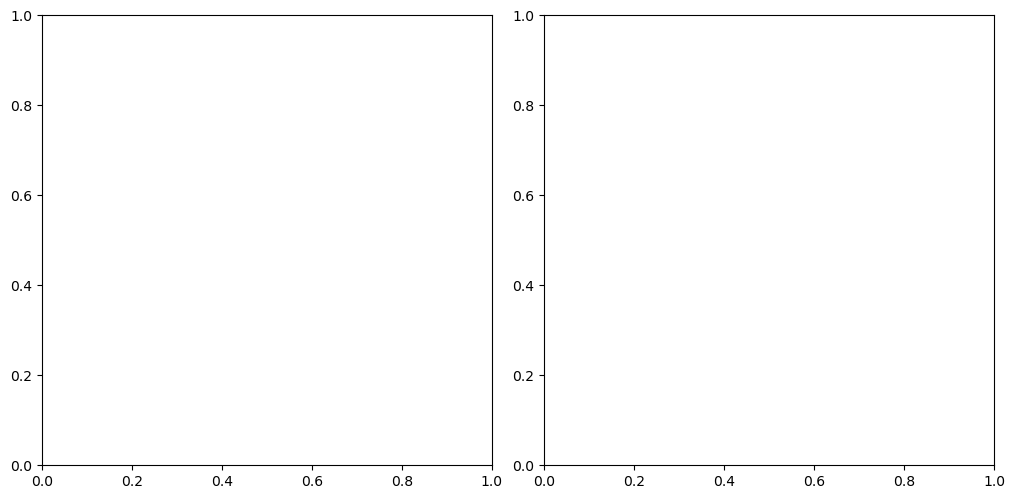

In [163]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import autograd.numpy as np
# import custom libraries
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
# import demos for your notebook
static_plotter = optlib.static_plotter.Visualizer();
#call the function for visualising the optim. steps
static_plotter.two_input_contour_plot(g,weight_history,num_contours = 30,
xmin = -3.3,xmax = 2.7,ymin = -5,ymax = 3)

In [153]:
print(f"weight_history shape: {np.array(weight_history).shape}")

weight_history shape: (21, 2)
